In [177]:
import pandas as pd
import numpy as np


In [153]:
df = pd.read_csv('/content/weight-height.csv')

In [154]:
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [155]:
df.Height=df.Height * 2.54
df.Weight=df.Weight * 0.45

In [156]:
print(df)

      Gender      Height      Weight
0       Male  187.571423  108.852103
1       Male  174.706036   73.039713
2       Male  188.239668   95.733385
3       Male  182.196685   99.019112
4       Male  177.499761   92.857410
...      ...         ...         ...
9995  Female  168.078536   61.549854
9996  Female  170.350573   76.890558
9997  Female  162.224700   57.813893
9998  Female  175.346978   73.733608
9999  Female  157.338385   51.142096

[10000 rows x 3 columns]


In [157]:
df['Gender']= pd.factorize(df['Gender'])[ 0 ]

In [158]:
dfMale = df[df['Gender'] == 0]
dfFemale = df[df['Gender'] == 1]

In [159]:
print(dfFemale)

      Gender      Height     Weight
5000       1  149.633259  45.939747
5001       1  165.684232  63.587620
5002       1  160.957270  58.968631
5003       1  163.779193  57.677180
5004       1  156.954464  58.401633
...      ...         ...        ...
9995       1  168.078536  61.549854
9996       1  170.350573  76.890558
9997       1  162.224700  57.813893
9998       1  175.346978  73.733608
9999       1  157.338385  51.142096

[5000 rows x 3 columns]


In [160]:
sr_Height_Male= dfMale['Height'].mean()
sr_Weight_Male= dfMale['Weight'].mean()
sr_Height_Female= dfFemale['Height'].mean()
sr_Weight_Female= dfFemale['Weight'].mean()


In [161]:
quintiles =df.quantile([.1, .25, .5, .75], axis = 0)
print(quintiles)

      Gender      Height     Weight
0.10     0.0  155.988261  53.889343
0.25     0.0  161.304276  61.118123
0.50     0.5  168.447898  72.545817
0.75     1.0  175.702625  84.226286


In [162]:
print(df.std( ))

Gender     0.500025
Height     9.772721
Weight    14.448798
dtype: float64


In [163]:
print('max= \n' ,df.max() ,"\nmin= \n",df.min(),"\nзначений 10000")

max= 
 Gender      1.000000
Height    200.656806
Weight    121.495364
dtype: float64 
min= 
 Gender      0.000000
Height    137.828359
Weight     29.115057
dtype: float64 
значений 10000


In [164]:
dfFemale.pop("Gender")
dfMale.pop("Gender")


0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Gender, Length: 5000, dtype: int64

женьщины


array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

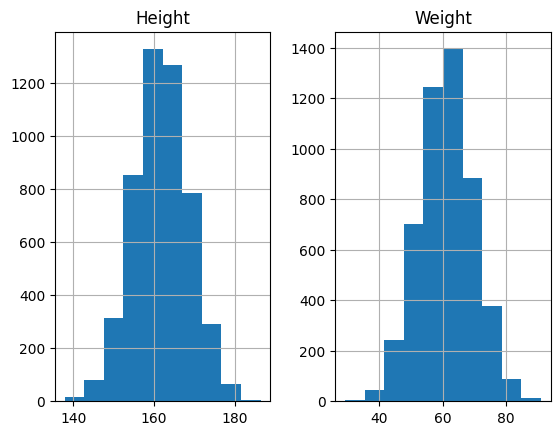

In [165]:
print("женьщины")
dfFemale.hist()

мужчины


array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

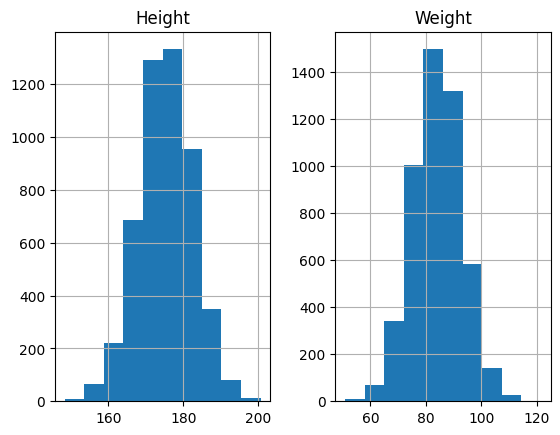

In [166]:
print("мужчины")
dfMale.hist()

общий


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

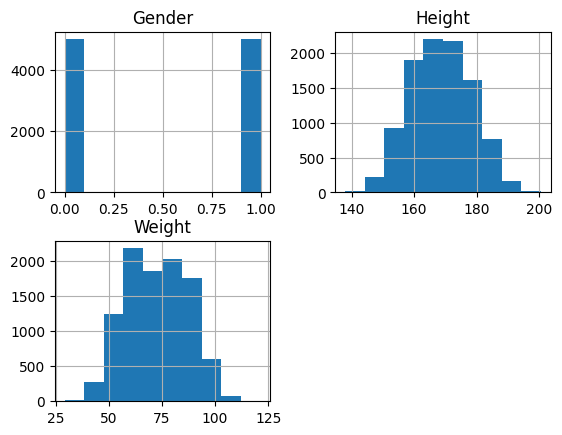

In [167]:
print("общий")
df.hist()

In [168]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df1=df.copy()



In [172]:
df1.pop('Gender')
scaled_df = StandardScaler().fit_transform(df1)

kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

kmeans.fit(scaled_df)

print(kmeans.labels_)

[1 1 1 ... 0 1 0]


In [176]:
arr1=list(kmeans.labels_)
arr2=list(df.Gender)
result=0
for f, b in zip(arr1, arr2):
    if f!=b:
      result=result+1
print(result)#количество совпадений

8799


In [178]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [187]:
data = list(zip(df.Height, df.Weight))


In [185]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[0 0 0 ... 1 0 1]


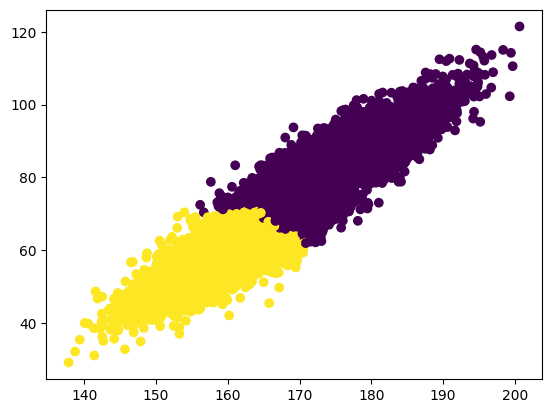

In [193]:
plt.scatter(df.Height,df.Weight , c=labels)
plt.show()

In [184]:
arr1=list(labels)
arr2=list(df.Gender)
result=0
for f, b in zip(arr1, arr2):
    if f==b:
      result=result+1
print(result)#количество совпадений

8581
